From here: https://juanitorduz.github.io/laplacian_eigenmaps_dim_red/

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import numpy as np
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA


from collections import OrderedDict
from functools import partial
from time import time


%matplotlib inline

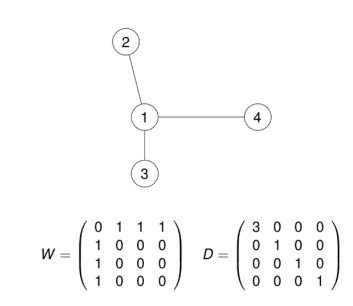

In [ ]:
# Construct the adjacency matrix from the graph for n_neighbors = 1.
W = np.array([[0, 1, 1, 1],
              [1, 0, 0, 0],
              [1, 0, 0, 0],
              [1, 0, 0, 0]])

# Construct the degree matrix D from W.
D = np.diag(np.apply_along_axis(arr=W,
                                func1d=np.sum,
                                axis=0))
# Compute the graph Laplacian.
L = D - W

print(L)

[[ 3 -1 -1 -1]
 [-1  1  0  0]
 [-1  0  1  0]
 [-1  0  0  1]]


In [ ]:
y = manifold.spectral_embedding(adjacency=W,
                                n_components=1,
                                norm_laplacian=False,
                                drop_first=True,
                                eigen_solver='lobpcg')

print(y)

[[ 0.        ]
 [-0.57735027]
 [ 0.78867513]
 [-0.21132487]]


In [ ]:
lambda_1 = 1

# Check if the previous output coincides with the analytical requirement.
np.array_equal(a1=np.dot(L, y),
               a2=lambda_1*np.dot(D, y))

True

In [ ]:
Swiss_curve, Swiss_colors = datasets.make_swiss_roll(n_samples=10000, noise=0.0, random_state=0)

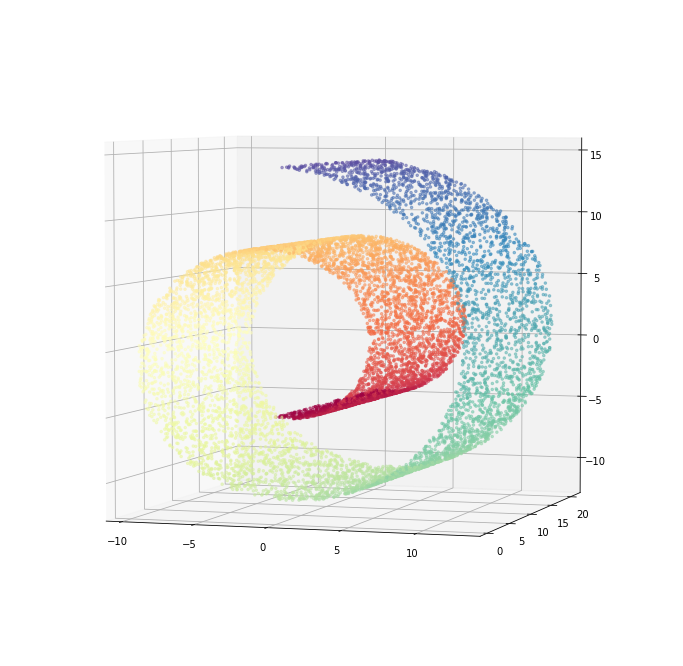

In [ ]:
Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Swiss_curve[:, 0], Swiss_curve[:, 1], Swiss_curve[:, 2],
           c=Swiss_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

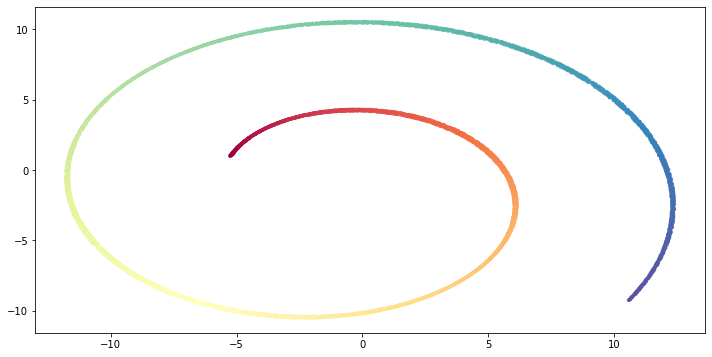

In [ ]:
# Fit PCA object.
Swiss_curve_pca = PCA(n_components=2).fit_transform(Swiss_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(Swiss_curve_pca[:, 0], Swiss_curve_pca[:, 1],
           c=Swiss_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral);

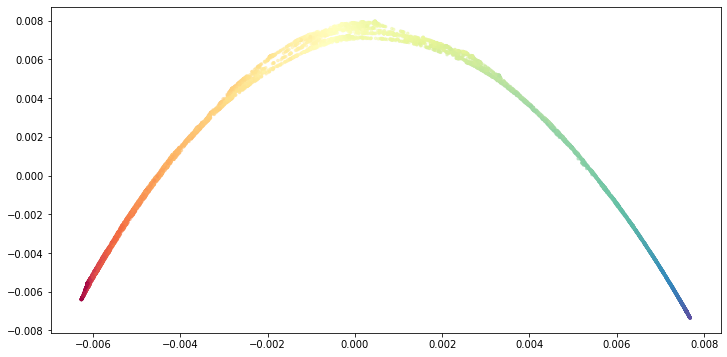

In [ ]:
# Set the number of n_neighbors;
n_neighbors = 5
# Set the dimension of the target space.
n_components = 2
# Construct the SpectralEmbedding object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity= 'nearest_neighbors',
                                n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object.
Swiss_curve_red = se.fit_transform(X=Swiss_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(Swiss_curve_red[:, 0], Swiss_curve_red[:, 1],
           c=Swiss_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral);

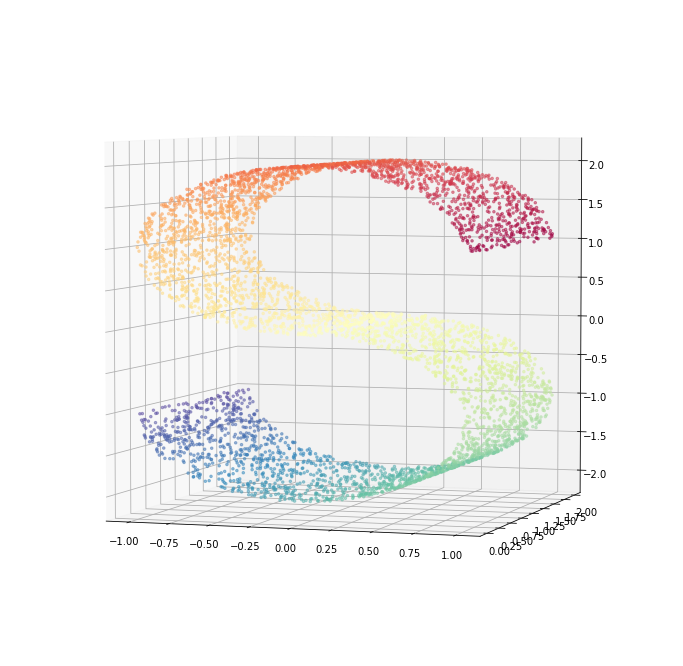

In [ ]:
# Define the number of points to consider.
n_points = 5000

# Get the data and color map.
S_curve, S_colors = datasets.make_s_curve(n_points, random_state=0)

Axes3D


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S_curve[:, 0], S_curve[:, 1], S_curve[:, 2],
           c=S_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral)
ax.view_init(4, -72);

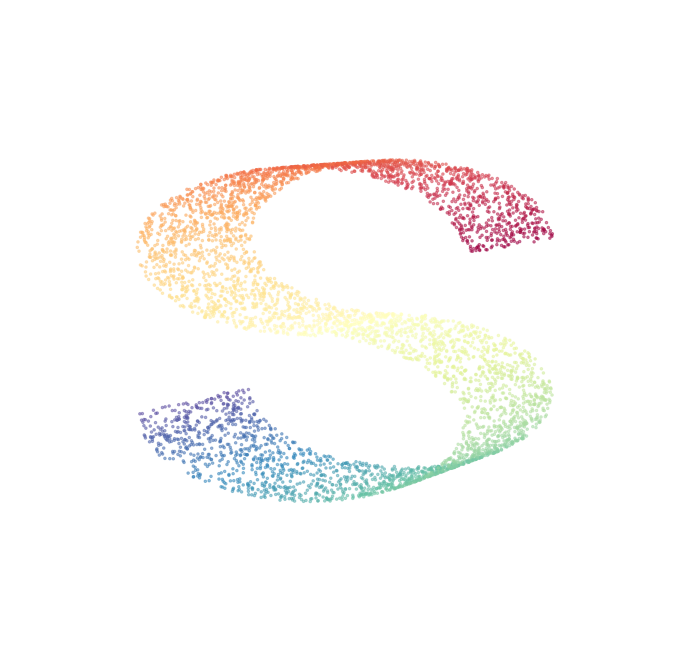

In [ ]:
# Define the number of points to consider.
n_points = 5000

# Get the data and color map.
S_curve, S_colors = datasets.make_s_curve(n_points, random_state=0)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(S_curve[:, 0], S_curve[:, 1], S_curve[:, 2],
           c=S_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral)
plt.axis('off')

ax.view_init(4, -72);


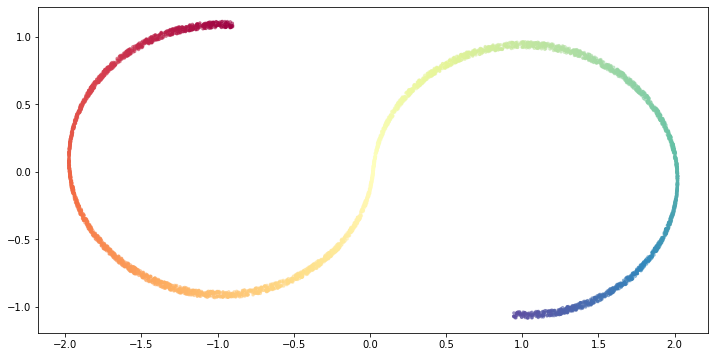

In [ ]:
# Fit PCA object.
S_curve_pca = PCA(n_components=2).fit_transform(S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.scatter(S_curve_pca[:, 0], S_curve_pca[:, 1],
           c=S_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral);

The result is coincides with ouur intuition, it is basically projecting to an axis so that the variance is maximized.

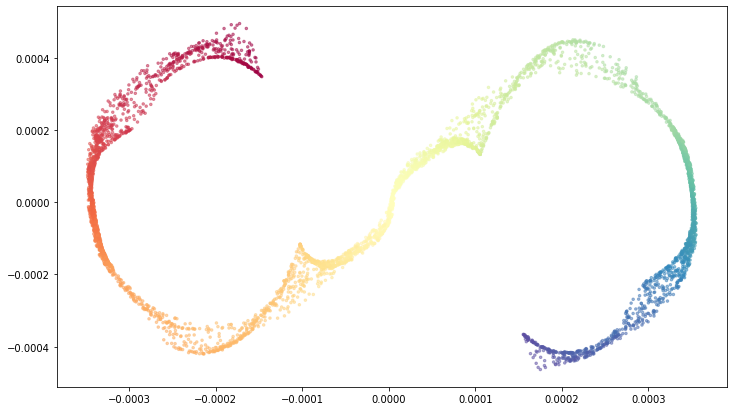

In [ ]:
# Set the number of n_neighbors;
n_neighbors = 3500

# Set the dimension of the target space.
n_components = 2

# Construct the SpectralEmbedding object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity= 'nearest_neighbors',
                                n_neighbors=n_neighbors)

# Fit the SpectralEmbedding object.
S_curve_red = se.fit_transform(X=S_curve)

# Visualize the result.
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
ax.scatter(S_curve_red[:, 0], S_curve_red[:, 1],
           c=S_colors, s=25, alpha=.5, marker=".",
           cmap=plt.cm.Spectral);

We see that SpectralEmbedding unroll the S-curve so that the locallity is preserved on average.

In [ ]:
# Create our sphere.
n_samples = 6000

angle_parameter = 0.5 # Try 0.01
pole_hole_parameter = 8 # Try 50

random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - angle_parameter)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / pole_hole_parameter))) &
           (t > ((np.pi / pole_hole_parameter))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
          np.sin(t[indices]) * np.sin(p[indices]), \
          np.cos(t[indices])

sphere_data = np.array([x, y, z]).T

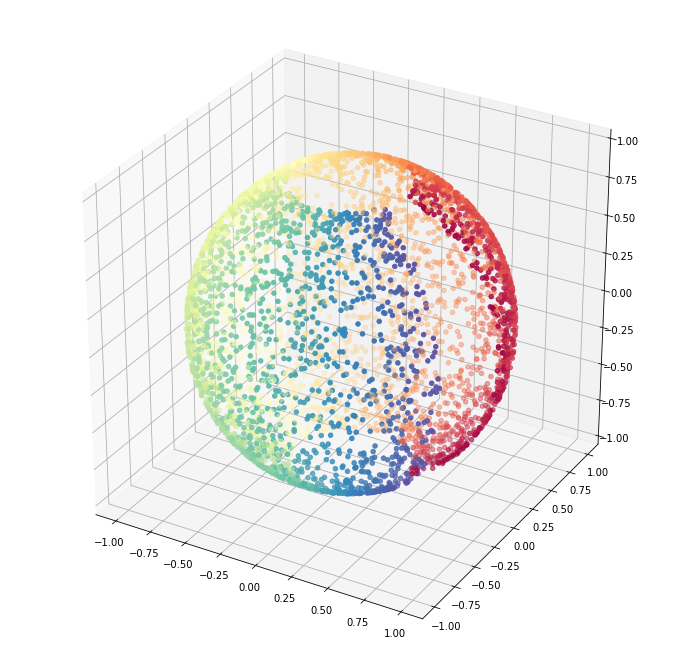

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           c=colors,
           cmap=plt.cm.Spectral);

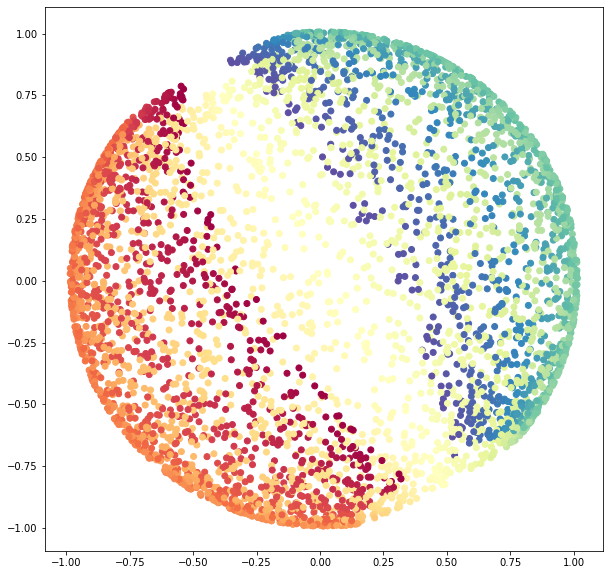

In [ ]:
sphere_pca = PCA(n_components=2).fit_transform(sphere_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_pca[:, 0], sphere_pca[:, 1],
           c=colors,
           cmap=plt.cm.Spectral);

In [ ]:
n_neighbors = 7
n_components = 2

# Fit the object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)

sphere_data_red = se.fit_transform(X=sphere_data)

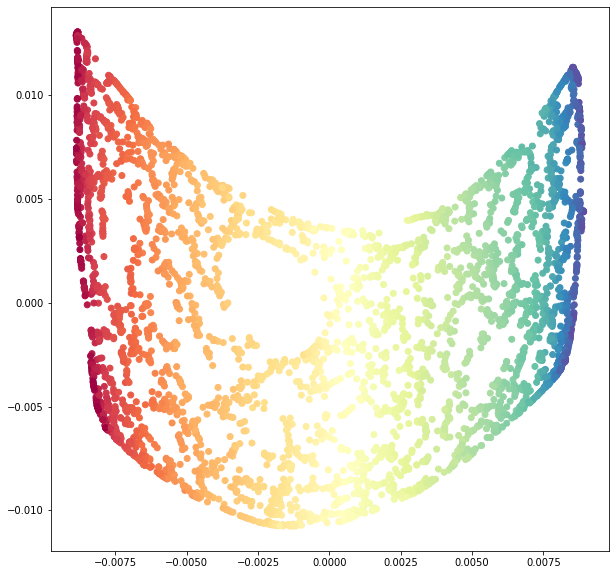

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_data_red[:, 0], sphere_data_red[:, 1],
           c=colors,
           cmap=plt.cm.Spectral);

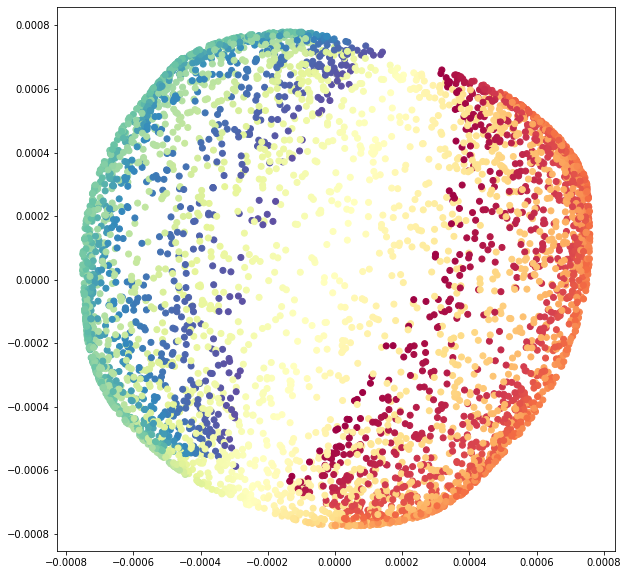

In [ ]:
n_neighbors = 1000

# Fit the object.
se = manifold.SpectralEmbedding(n_components=n_components,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)

sphere_data_red = se.fit_transform(X=sphere_data)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(sphere_data_red[:, 0], sphere_data_red[:, 1],
           c=colors,
           cmap=plt.cm.Spectral);